In [14]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [15]:
root = '/home/turnyur/sommer-sem-2024/CV/Exercises/'
res_00 = '00/exercise_0_introduction/resources'

file = 'umah.jpeg'  ## path to the image
input_path = os.path.join(root, res_00, file)
img = cv2.imread(input_path, cv2.IMREAD_COLOR)
img_array = np.array(img) 

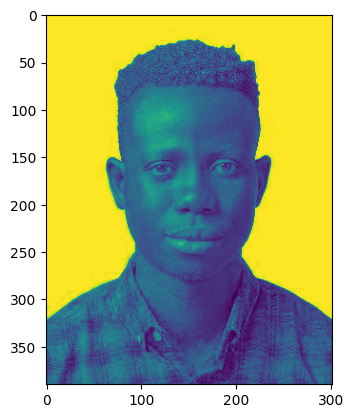

In [16]:
blue_c, green_c, red_c = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]
plt.imshow(blue_c)

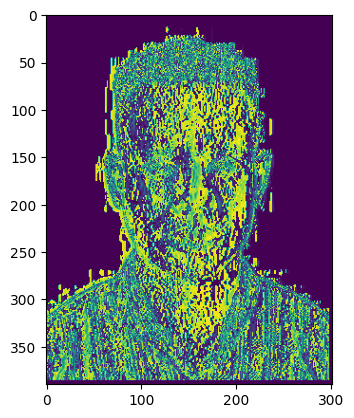

In [17]:
conv_image = np.ones_like(blue_c)
filter_m = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                     [-1, 0, 1]])
for i in range(blue_c.shape[0]- filter_m.shape[0]-1):
    for j in range(blue_c.shape[1] - filter_m.shape[1]-1):
        conv_image[i, j] = np.sum(blue_c[i:i+filter_m.shape[0], j:j+filter_m.shape[1]] * filter_m)
        #print()

plt.imshow(conv_image)

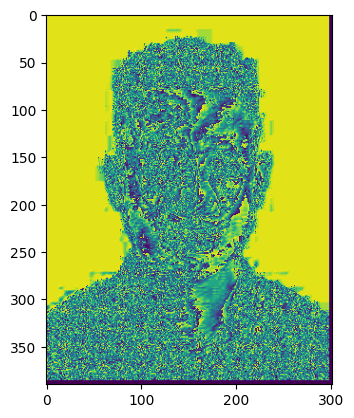

In [18]:
conv_image = np.zeros_like(blue_c)
filter_m = np.array([[1, 0, 11],
                    [2, 0, -2],
                     [1, 0, -1]])
for i in range(blue_c.shape[0]- filter_m.shape[0]-1):
    for j in range(blue_c.shape[1] - filter_m.shape[1]-1):
        conv_image[i, j] = np.sum(blue_c[i:i+filter_m.shape[0], j:j+filter_m.shape[1]] * filter_m)
        #print()

plt.imshow(conv_image)

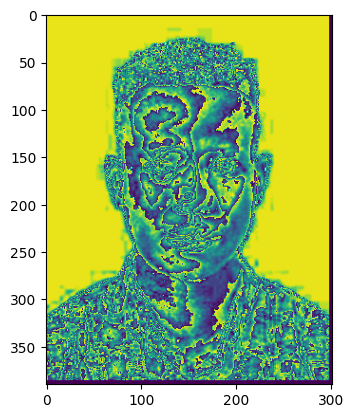

In [19]:
factor = 1
box_filter = np.array([[1,1,1],[1,1,1],[1,1,1]])/factor
conv_image = np.zeros_like(blue_c)
filter_m = box_filter

for i in range(blue_c.shape[0]- filter_m.shape[0]-1):
    for j in range(blue_c.shape[1] - filter_m.shape[1]-1):
        conv_image[i, j] = np.sum(blue_c[i:i+filter_m.shape[0], j:j+filter_m.shape[1]] * filter_m)
        #print()

plt.imshow(conv_image)

In [20]:
filter_size =3
for i in range(blue_c.shape[0]-filter_size + 1):
    for j in range(blue_c.shape[1]- filter_size+1):
        region = blue_c[i:i+filter_size,j:j+filter_size]
        conv_image[i,j] = np.sum(region * box_filter)

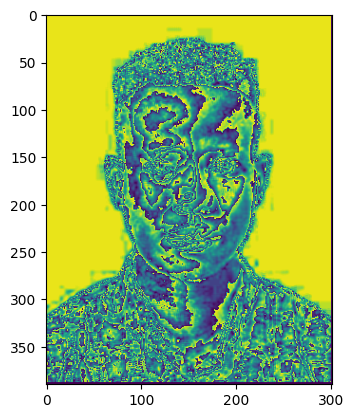

In [21]:
plt.imshow(conv_image)    

In [22]:
import cv2 as cv

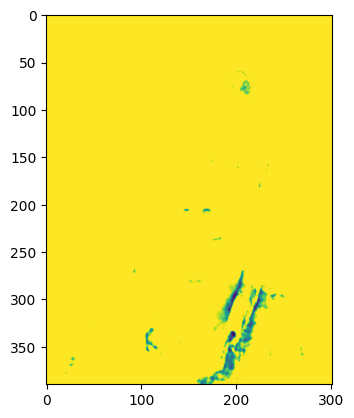

In [23]:
plt.imshow(cv.filter2D(blue_c, ddepth=-1, kernel=filter_m))

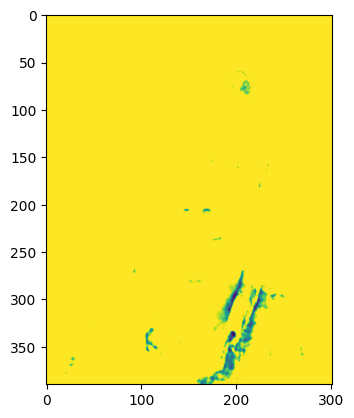

In [24]:
plt.imshow(cv.filter2D(blue_c, ddepth=-1, kernel=cv.flip(filter_m, -1)))

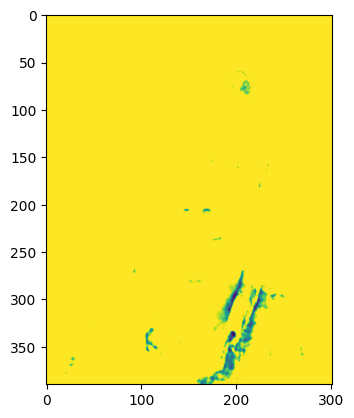

In [25]:
plt.imshow(cv.filter2D(blue_c, ddepth=-1, kernel=cv.flip(filter_m*box_filter, -1)))

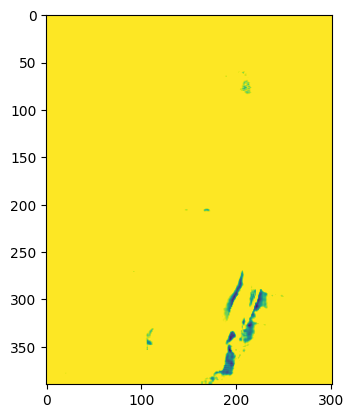

In [26]:
plt.imshow(cv.filter2D(green_c, ddepth=-1, kernel=cv.flip(box_filter*box_filter, -1)))

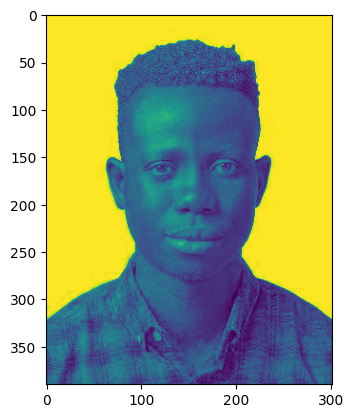

In [27]:
identity_filter = np.zeros_like(box_filter)
identity_filter[1,1] =1
plt.imshow(cv.filter2D(blue_c, ddepth=-1, kernel =cv.flip(identity_filter, -1)))

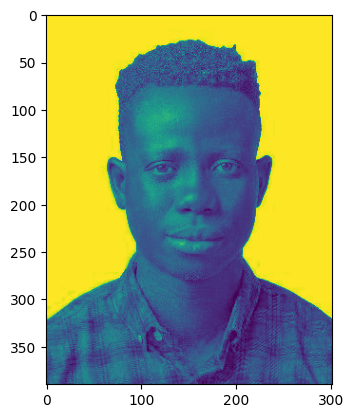

In [28]:
shift_filter = np.zeros_like(box_filter)
shift_filter[1,2] = 1
plt.imshow(cv.filter2D(blue_c, ddepth=-1, kernel =cv.flip(shift_filter, -1)))

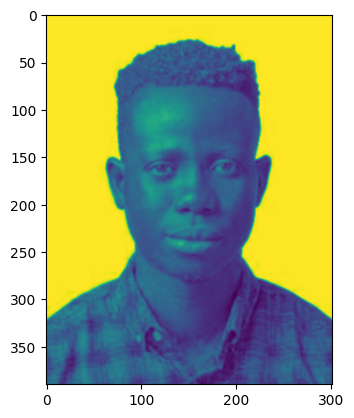

In [29]:
box_filter = np.ones_like(box_filter)/9
#box_filter[1,2] = 1
plt.imshow(cv.filter2D(blue_c, ddepth=-1, kernel =cv.flip(box_filter, -1)))

In [30]:
box_filter

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

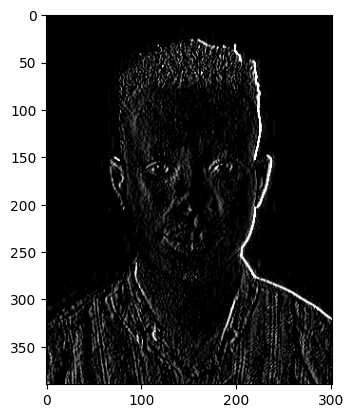

In [31]:
sobel_filter_x = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
plt.imshow(cv.filter2D(blue_c, ddepth=-1, kernel =cv.flip(sobel_filter_x, -1)), cmap='grey')

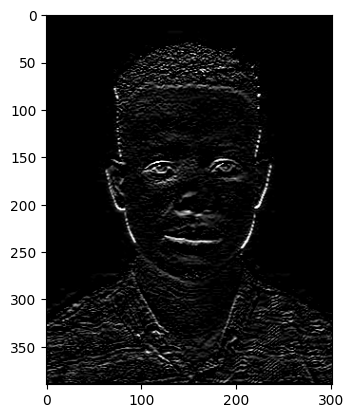

In [32]:
sobel_filter_y = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])
plt.imshow(cv.filter2D(blue_c, ddepth=-1, kernel =cv.flip(sobel_filter_y, -1)), cmap='gray')

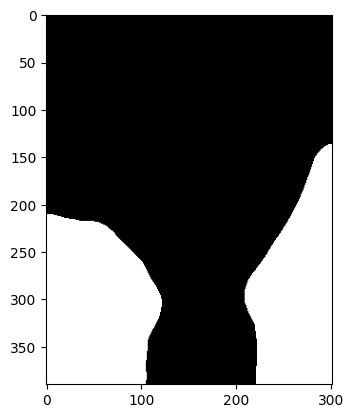

In [33]:
# Convolving Image with itself!
conv_filter = blue_c
plt.imshow(cv.filter2D(blue_c, ddepth=-1, kernel =cv.flip(conv_filter, -1)), cmap='gray')

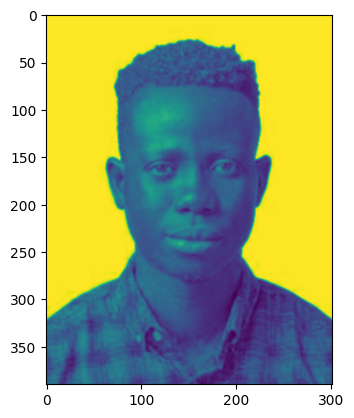

In [34]:
# Convolution vs correlation
box_filter = np.ones_like(box_filter)/9
#box_filter[1,2] = 1
plt.imshow(cv.filter2D(blue_c, ddepth=-1, kernel =cv.flip(box_filter, -1)))

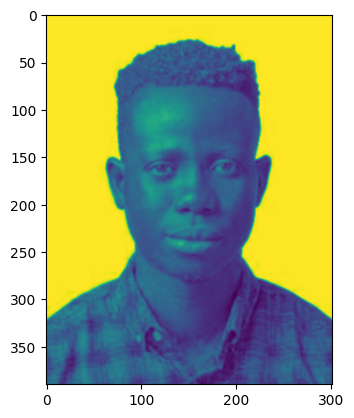

In [35]:
plt.imshow(cv.filter2D(blue_c, ddepth=-1, kernel =box_filter))

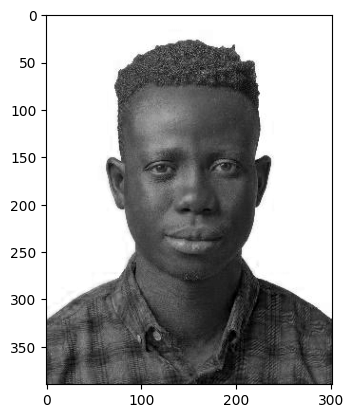

In [36]:
plt.imshow(blue_c, cmap='gray')

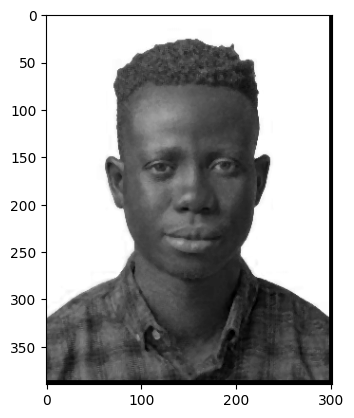

In [37]:
# Median Filter

filter_size =3
conv_image = np.zeros_like(blue_c)

for i in range(blue_c.shape[0]- filter_size-1):
    for j in range(blue_c.shape[1] - filter_size-1):
        window = blue_c[i:i+filter_size, j:j+filter_size]
        median = np.sort(window.reshape(-1))[4]
        conv_image[i, j] = median
        #print()

plt.imshow(conv_image, cmap='gray')

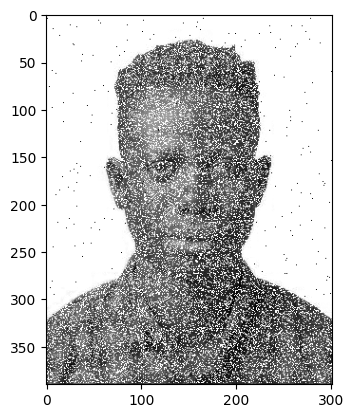

In [38]:
# Salt and Pepper noise

def add_salt_and_pepper_noise(image: np.ndarray, salt_prob: float, pepper_prob: float) -> np.ndarray:
    """
    Add salt and pepper noise to an image.

    Args:
        image: Input image as a numpy array.
        salt_prob: Probability of adding salt (white pixels).
        pepper_prob: Probability of adding pepper (black pixels).

    Returns:
        Noisy image as a numpy array.
    """
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Add salt noise
    num_salt = np.ceil(salt_prob * total_pixels).astype(int)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 255  # Set salt pixels to white

    # Add pepper noise
    num_pepper = np.ceil(pepper_prob * total_pixels).astype(int)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 0  # Set pepper pixels to black

    return noisy_image


img_noise = add_salt_and_pepper_noise(img_array, 0.1, 0.001)
plt.imshow(img_noise[:,:, 0], cmap='gray')

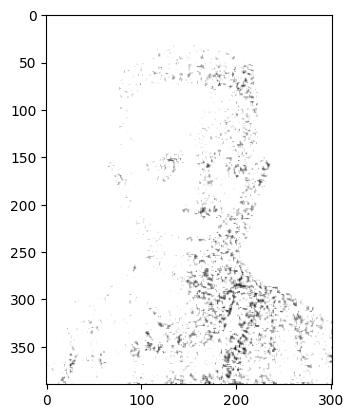

In [39]:
# Mean Filter

box_filter = np.ones((3,3)) /3
#box_filter[1,2] = 1
plt.imshow(cv.filter2D(img_noise[:,:, 0], ddepth=-1, kernel =cv.flip(box_filter, -1)), cmap='gray')

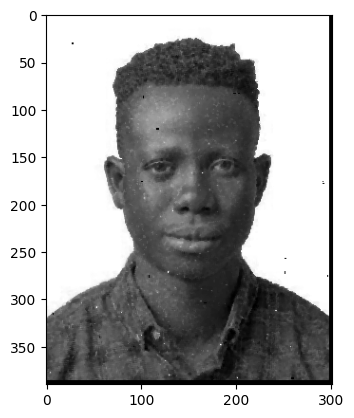

In [40]:
# Median Filter

filter_size =3
#filter_size =11
conv_image = np.zeros_like(blue_c)

for i in range(img_noise.shape[0]- filter_size-1):
    for j in range(img_noise.shape[1] - filter_size-1):
        window = img_noise[i:i+filter_size, j:j+filter_size]
        median = np.sort(window.reshape(-1))[4]
        conv_image[i, j] = median
        #print()

plt.imshow(conv_image, cmap='gray')

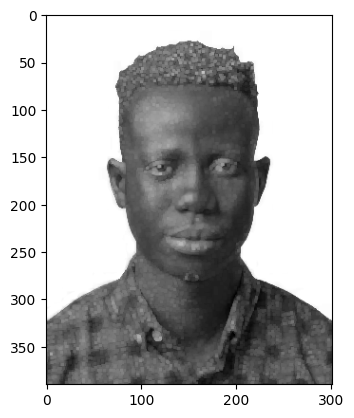

In [41]:
# Morphological OPerations

dilation_kernel = np.ones((3, 3), dtype=np.uint8)
dilated_image = cv.dilate(blue_c, dilation_kernel)
plt.imshow(dilated_image, cmap='gray')

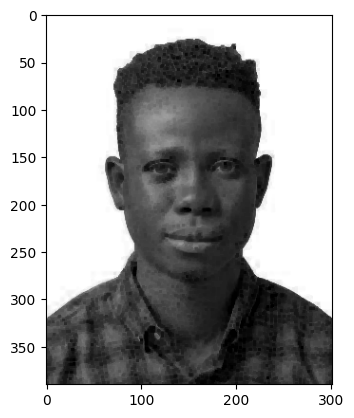

In [42]:
# Morphological OPerations

erode_kernel = np.ones((3, 3), dtype=np.uint8)
eroded_image = cv.erode(blue_c, erode_kernel)
plt.imshow(eroded_image, cmap='gray')

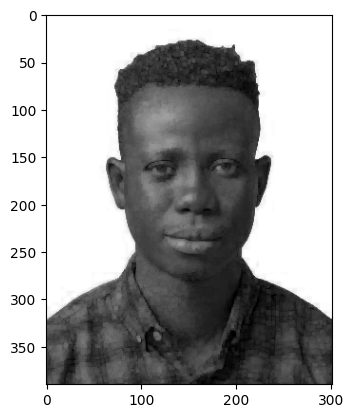

In [43]:
opening_kernel = np.ones((3, 3), dtype=np.uint8)
opened_image = cv.morphologyEx(blue_c, cv.MORPH_OPEN, opening_kernel)
plt.imshow(opened_image, cmap='gray')

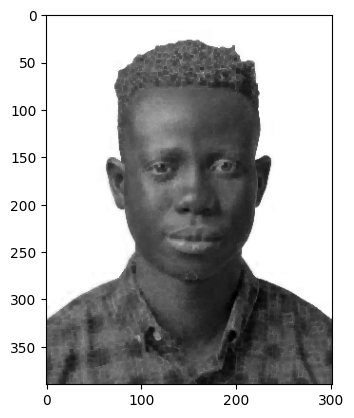

In [44]:
closing_kernel = np.ones((3, 3), dtype=np.uint8)
closed_image = cv.morphologyEx(blue_c, cv.MORPH_CLOSE, closing_kernel)
plt.imshow(closed_image, cmap='gray')



In [45]:
# Subsampling pixels
subsample_factor = 15
subsampled = blue_c[::subsample_factor, ::subsample_factor]
#subsampled

In [46]:
subsampled.shape, blue_c.shape

((26, 21), (390, 302))

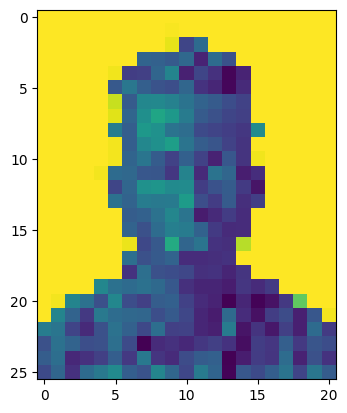

In [47]:
plt.imshow(subsampled)

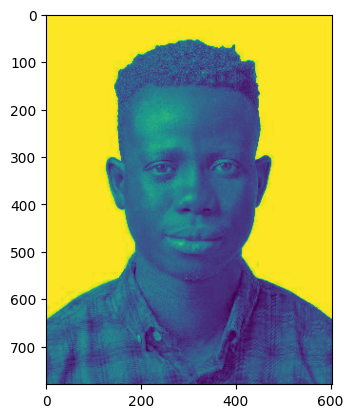

In [48]:
# Upsampling
upsample_factor = 2

# Original image (blue_c) size
height, width = blue_c.shape

# Create an empty array for the upsampled image
upsampled_image = np.zeros((height * upsample_factor, width * upsample_factor), dtype=blue_c.dtype)

# Fill the new array by repeating each pixel value
for i in range(height):
    for j in range(width):
        upsampled_image[i*upsample_factor:(i+1)*upsample_factor, j*upsample_factor:(j+1)*upsample_factor] = blue_c[i, j]

# Display the upsampled image
plt.imshow(upsampled_image)

In [49]:
upsampled_image.shape

(780, 604)

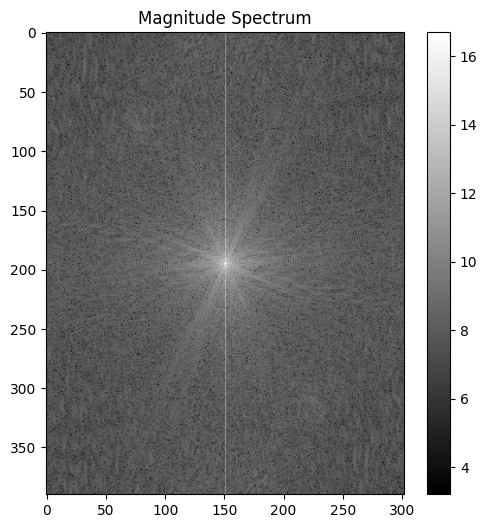

In [50]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Step 1: Perform 2D Fast Fourier Transform on the image
# Assuming blue_c is a 2D grayscale image
f_transform = np.fft.fft2(blue_c)

# Step 2: Shift the zero frequency component to the center
f_transform_shifted = np.fft.fftshift(f_transform)

# Step 3: Compute the magnitude spectrum (log for better visualization)
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

# Step 4: Display the magnitude spectrum
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.colorbar()
plt.show()


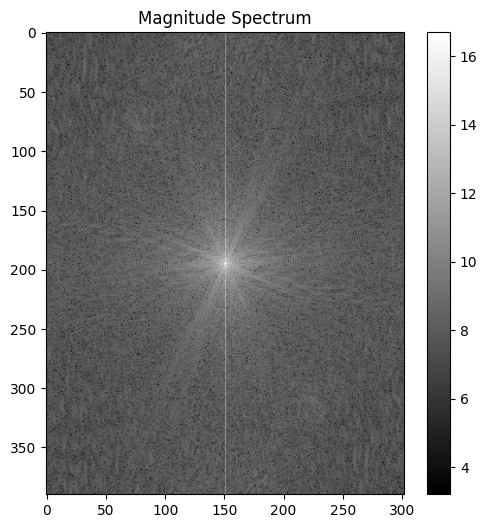

Max Frequency in the Image: 0.7071067811865476


In [51]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Step 1: Perform 2D Fast Fourier Transform on the image
f_transform = np.fft.fft2(blue_c)

# Step 2: Shift the zero frequency component to the center
f_transform_shifted = np.fft.fftshift(f_transform)

# Step 3: Compute the magnitude spectrum (log for better visualization)
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

# Step 4: Display the magnitude spectrum
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.colorbar()
plt.show()

# Step 5: Get the dimensions of the image
rows, cols = blue_c.shape
crow, ccol = rows // 2 , cols // 2  # Center of the frequency spectrum

# Step 6: Create meshgrid of frequency components for each dimension
freq_y = np.fft.fftfreq(rows)
freq_x = np.fft.fftfreq(cols)

# Step 7: Create a 2D grid of distances from the center (frequency domain)
freq_y_grid, freq_x_grid = np.meshgrid(freq_y, freq_x, indexing='ij')

# Step 8: Compute the distance from the center (Euclidean distance in frequency space)
distances = np.sqrt(freq_y_grid**2 + freq_x_grid**2)

# Step 9: Find the maximum frequency with significant magnitude in the spectrum
threshold = 0.01  # Threshold to exclude very low magnitude components (noise)
mask = magnitude_spectrum > threshold
max_freq = np.max(distances[mask])

print(f'Max Frequency in the Image: {max_freq}')


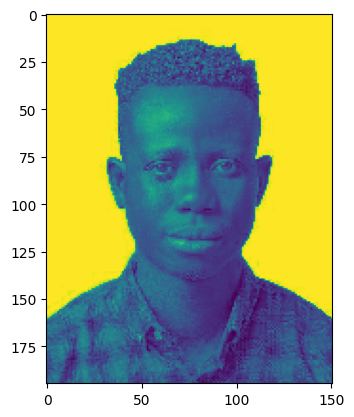

In [52]:
# Subsampling pixels
subsample_factor = 2 # 1.414 following nyquist criteria -> we round to 2
subsampled = blue_c[::subsample_factor, ::subsample_factor]
#subsampled
plt.imshow(subsampled)

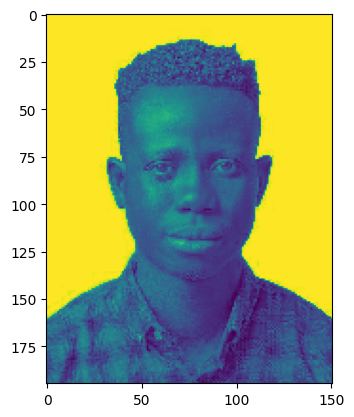

In [53]:
plt.imshow(subsampled)

In [54]:
# Guassian filter


def gaussian_filter(size: int, sigma: float) -> np.ndarray:
    """Create a Gaussian filter.
    
    Args:
        size (int): Size of the filter (must be odd).
        sigma (float): Standard deviation of the Gaussian distribution.
        
    Returns:
        np.ndarray: Gaussian filter.
    """
    # Create a 1D Gaussian kernel
    ax = np.linspace(-(size // 2), size // 2, size)
    gauss = np.exp(-0.5 * (ax**2) / sigma**2)
    gauss = gauss / np.sum(gauss)  # Normalize the kernel
    
    # Create a 2D Gaussian filter by outer product
    gaussian_filter_2d = np.outer(gauss, gauss)
    
    return gaussian_filter_2d

# Create 3x3 and 9x9 Gaussian filters
gaussian_filter_3x3 = gaussian_filter(3, sigma=1)
gaussian_filter_9x9 = gaussian_filter(90, sigma=1)



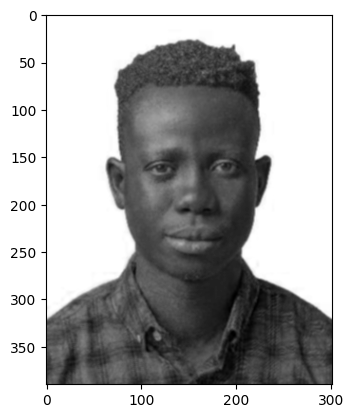

In [55]:
# Guassian Filter
# 3x3
plt.imshow(cv.filter2D(blue_c, ddepth=-1, kernel =cv.flip(gaussian_filter_3x3, -1)), cmap='gray')

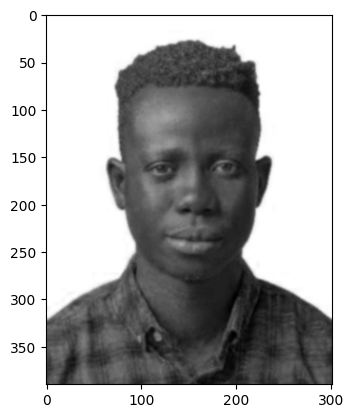

In [56]:
# Guassian Filter
# 3x3
blue_c_guass = cv.filter2D(blue_c, ddepth=-1, kernel =cv.flip(gaussian_filter_9x9, -1))
plt.imshow(blue_c_guass, cmap='gray')

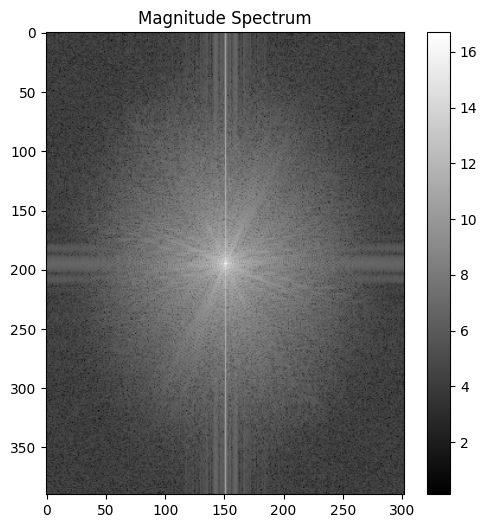

Max Frequency in the Image: 0.7071067811865476


In [57]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Step 1: Perform 2D Fast Fourier Transform on the image
f_transform = np.fft.fft2(blue_c_guass)

# Step 2: Shift the zero frequency component to the center
f_transform_shifted = np.fft.fftshift(f_transform)

# Step 3: Compute the magnitude spectrum (log for better visualization)
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

# Step 4: Display the magnitude spectrum
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.colorbar()
plt.show()

# Step 5: Get the dimensions of the image
rows, cols = blue_c.shape
crow, ccol = rows // 2 , cols // 2  # Center of the frequency spectrum

# Step 6: Create meshgrid of frequency components for each dimension
freq_y = np.fft.fftfreq(rows)
freq_x = np.fft.fftfreq(cols)

# Step 7: Create a 2D grid of distances from the center (frequency domain)
freq_y_grid, freq_x_grid = np.meshgrid(freq_y, freq_x, indexing='ij')

# Step 8: Compute the distance from the center (Euclidean distance in frequency space)
distances = np.sqrt(freq_y_grid**2 + freq_x_grid**2)

# Step 9: Find the maximum frequency with significant magnitude in the spectrum
threshold = 0.01  # Threshold to exclude very low magnitude components (noise)
mask = magnitude_spectrum > threshold
max_freq = np.max(distances[mask])

print(f'Max Frequency in the Image: {max_freq}')


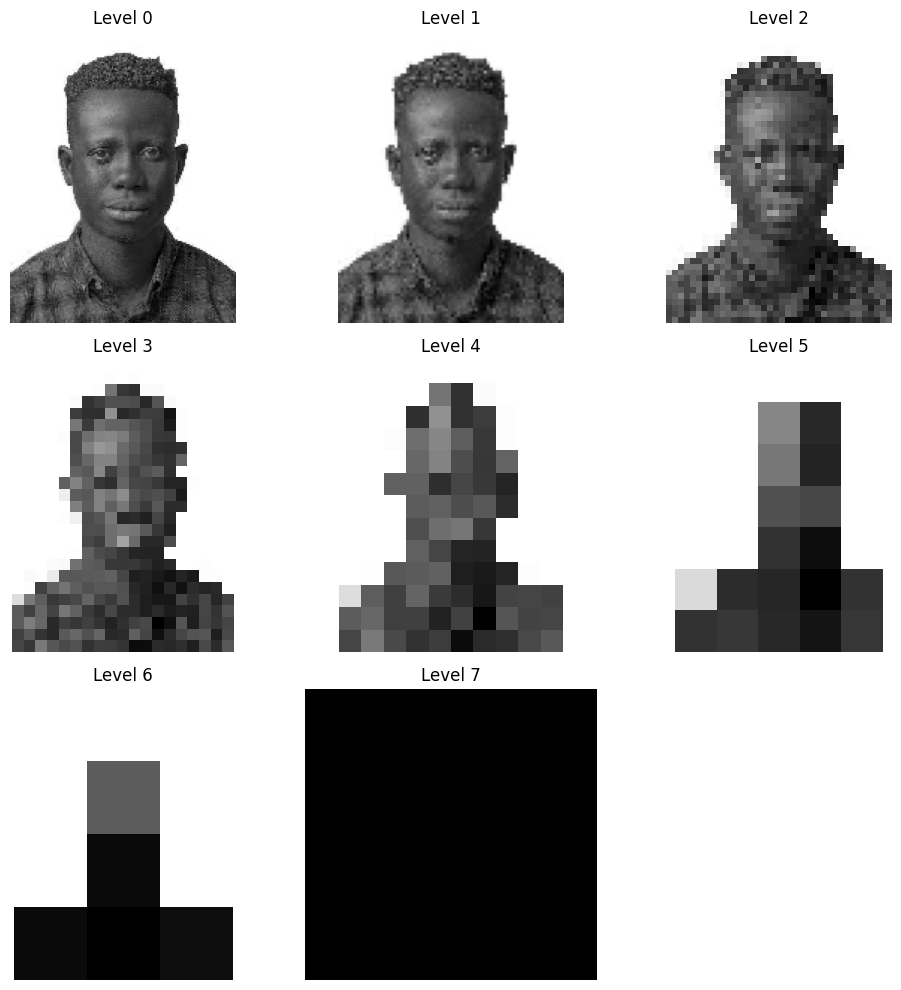

In [58]:
# Guass Image Pyramid
subsample_factor = 2
pyramid_levels = 8
current_image = blue_c.copy()

plt.figure(figsize=(10, 10))

for i in range(pyramid_levels):
    subsamp = current_image[::subsample_factor, ::subsample_factor]
    plt.subplot(3, 3, i + 1)  # Adjust subplot index
    plt.imshow(subsamp, cmap='gray')
    plt.title(f'Level {i}')
    plt.axis('off')  # Hide axis
    
    current_image = subsamp

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


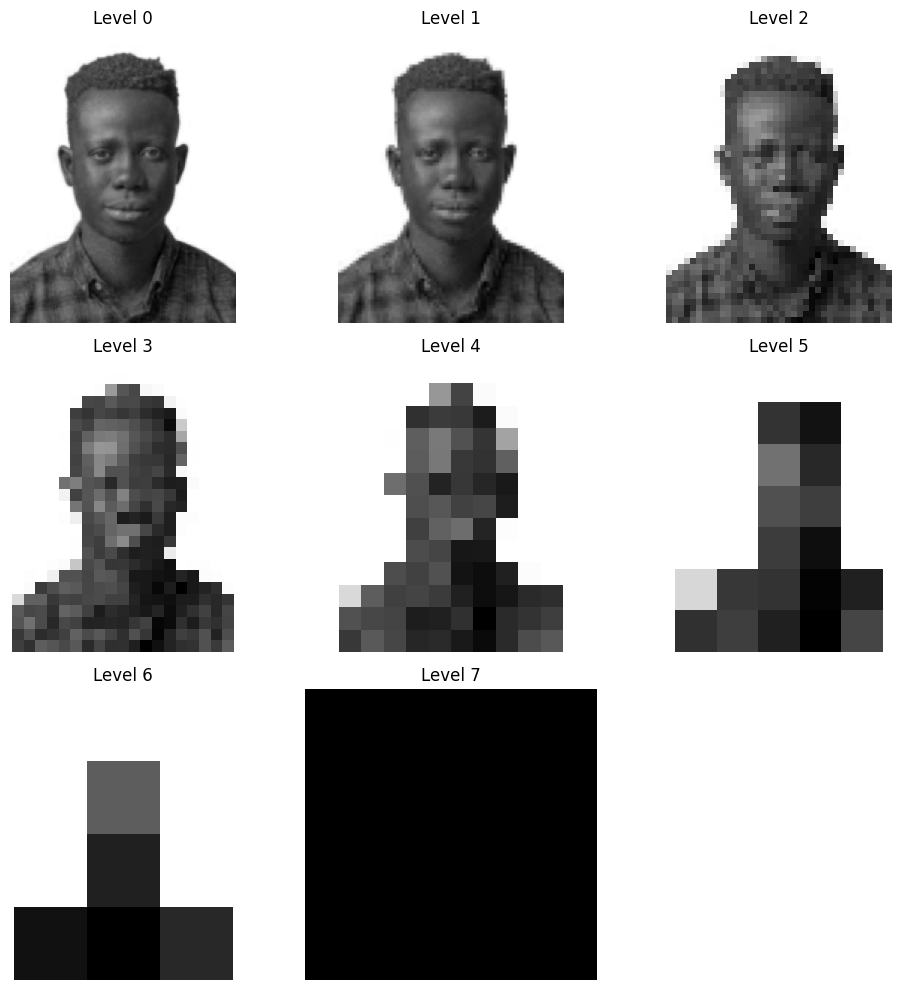

In [59]:
# Guass Image Pyramid
subsample_factor = 2
pyramid_levels = 8
current_image = blue_c_guass.copy()

plt.figure(figsize=(10, 10))

for i in range(pyramid_levels):
    subsamp = current_image[::subsample_factor, ::subsample_factor]
    plt.subplot(3, 3, i + 1)  # Adjust subplot index
    plt.imshow(subsamp, cmap='gray')
    plt.title(f'Level {i}')
    plt.axis('off')  # Hide axis
    
    current_image = subsamp

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


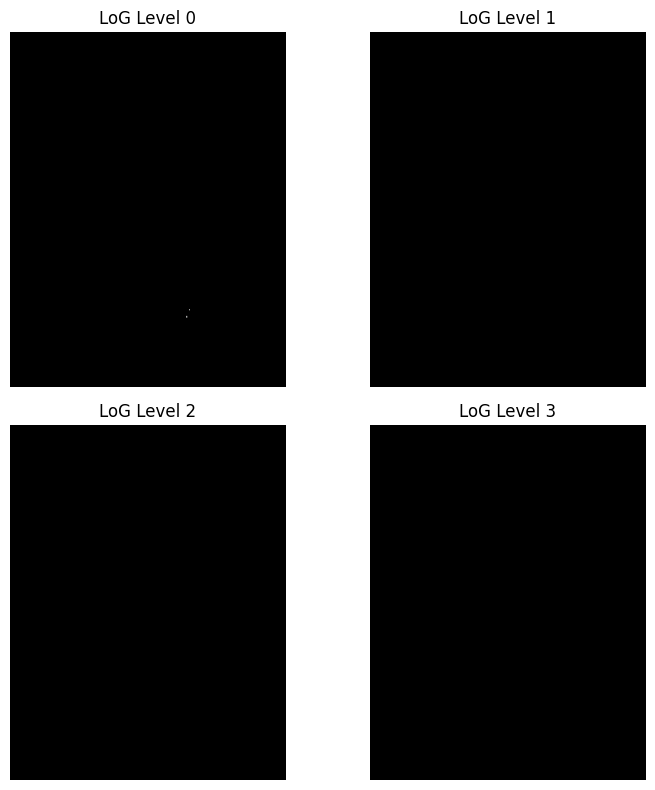

In [60]:
# Laplacian of Gaussian 
# LoG

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def gaussian_filter(size: int, sigma: float) -> np.ndarray:
    ax = np.linspace(-(size // 2), size // 2, size)
    gauss = np.exp(-0.5 * (ax**2) / sigma**2)
    gauss = gauss / np.sum(gauss)
    gaussian_filter_2d = np.outer(gauss, gauss)
    return gaussian_filter_2d

def laplacian_of_gaussian(size: int, sigma: float) -> np.ndarray:
    """Create a Laplacian of Gaussian filter."""
    ax = np.linspace(-(size // 2), size // 2, size)  # Define ax here
    gauss = gaussian_filter(size, sigma)
    laplacian = - (1 / (2 * np.pi * sigma**4)) * (1 - (ax**2 + ax[:, np.newaxis]) / (2 * sigma**2)) * gauss
    return laplacian

# Initialize parameters
subsample_factor = 2
pyramid_levels = 4

# Create a Laplacian of Gaussian filter
log_filter = laplacian_of_gaussian(5, sigma=1)  # Adjust size and sigma as needed

# Initialize the current image as the original image
current_image = blue_c.copy()

plt.figure(figsize=(8, 8))

for i in range(pyramid_levels):
    # Apply the Laplacian of Gaussian filter
    log_image = cv.filter2D(current_image, ddepth=-1, kernel=log_filter)
    
    # Plot the filtered image in the appropriate subplot
    plt.subplot(2, 2, i + 1)  # Adjust subplot index
    plt.imshow(log_image, cmap='gray')
    plt.title(f'LoG Level {i}')
    plt.axis('off')  # Hide axis

    # Subsample the current image for the next level
    current_image = current_image[::subsample_factor, ::subsample_factor]

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [61]:
x =np.linspace(0,10, 100)

In [62]:
y = np.sin(x)

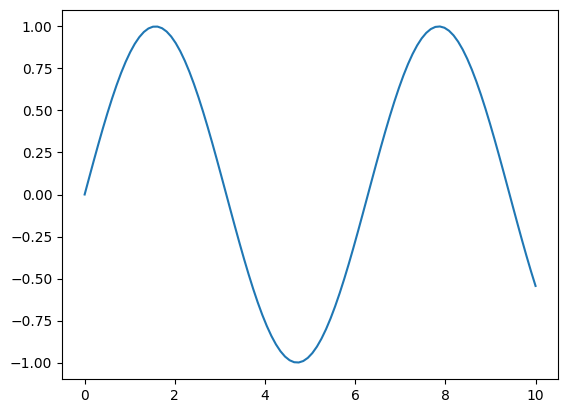

In [63]:
plt.plot(x,y)

In [64]:
blue_c.shape

(390, 302)

In [65]:
def pad_filter_to_image(filter, image_shape):
    padded_filter = np.zeros(image_shape)  # Create a zero array of the same shape as the image
    filter_shape = filter.shape
    # Place the filter in the center of the padded array
    start_x = (image_shape[0] - filter_shape[0]) // 2
    start_y = (image_shape[1] - filter_shape[1]) // 2
    padded_filter[start_x:start_x + filter_shape[0], start_y:start_y + filter_shape[1]] = filter
    return padded_filter

padded_gaussian_filter = pad_filter_to_image(gaussian_filter_9x9, blue_c.shape)
padded_gaussian_filter.shape

(390, 302)

In [66]:
plt.imshow(padded_filter)

NameError: name 'padded_filter' is not defined

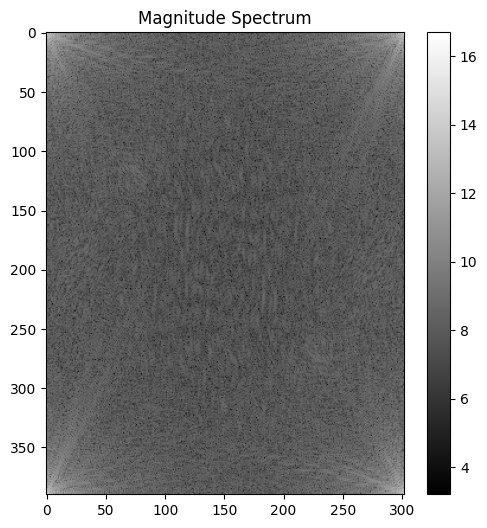

In [67]:
f_transform_image = np.fft.fft2(blue_c)


magnitude_spectrum = np.log(np.abs(f_transform_image) + 1)

# Step 4: Display the magnitude spectrum
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.colorbar()
plt.show()

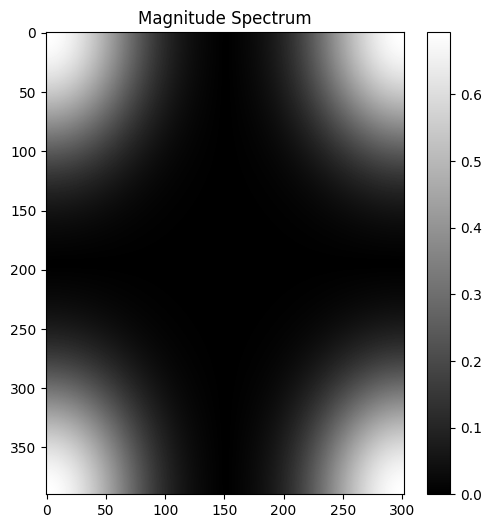

In [68]:
f_transform_filter = np.fft.fft2(padded_gaussian_filter)
magnitude_spectrum = np.log(np.abs(f_transform_filter) + 1)

# Step 4: Display the magnitude spectrum
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.colorbar()
plt.show()

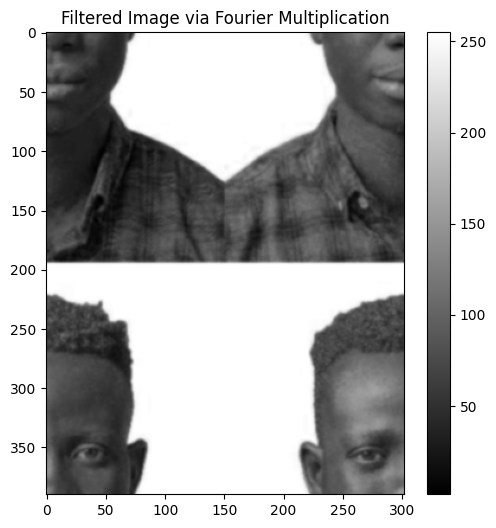

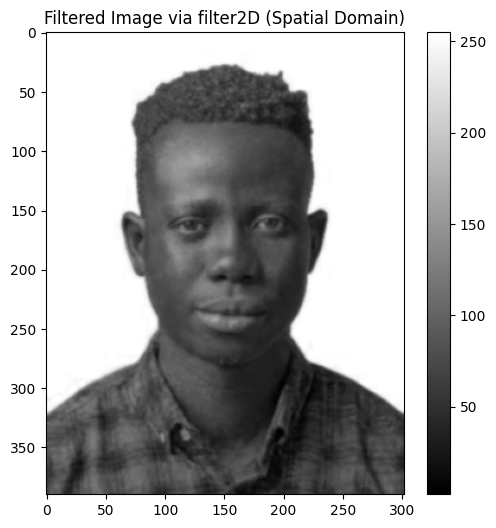

In [69]:
# Step 3: Multiply in the Fourier domain
f_transform_multiplication = f_transform_image * f_transform_filter

# Step 4: Inverse Fourier transform to return to spatial domain
inverse_transform = np.fft.ifft2(f_transform_multiplication)
filtered_image = np.abs(inverse_transform)  # Get the magnitude of the result

# Step 5: Visualize the filtered image
plt.figure(figsize=(6, 6))
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image via Fourier Multiplication')
plt.colorbar()
plt.show()

# For comparison, you can visualize the result of spatial convolution using cv2's filter2D:
blue_c_guass = cv.filter2D(blue_c, ddepth=-1, kernel=cv.flip(gaussian_filter_9x9, -1))

plt.figure(figsize=(6, 6))
plt.imshow(blue_c_guass, cmap='gray')
plt.title('Filtered Image via filter2D (Spatial Domain)')
plt.colorbar()
plt.show()

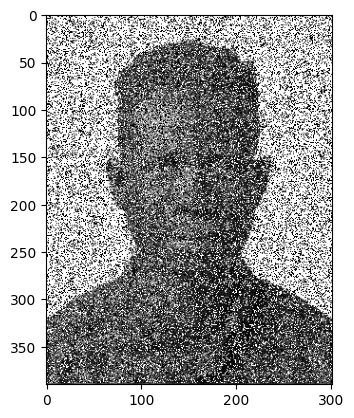

In [70]:
img_noise = add_salt_and_pepper_noise(img_array, 0.1, 0.1)
plt.imshow(img_noise[:,:, 0], cmap='gray')

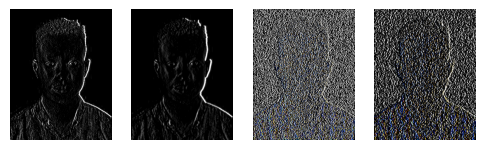

In [71]:
# Edge detection, effects of noise

sobel_filter_x = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])





rows = 1
cols = 4
plt.figure(figsize=(6, 6))
plt.subplot(rows, cols,1)
plt.axis('off')
plt.imshow(cv.filter2D(blue_c, ddepth=-1, kernel =cv.flip(sobel_filter_x, -1)), cmap='grey')


plt.subplot(rows, cols,2)
plt.axis('off')
plt.imshow(cv.filter2D(blue_c_guass, ddepth=-1, kernel =cv.flip(sobel_filter_x, -1)), cmap='grey')


plt.subplot(rows, cols,3)
plt.axis('off')
plt.imshow(cv.filter2D(img_noise, ddepth=-1, kernel =cv.flip(sobel_filter_x, -1)), cmap='grey')

# applying Guassian first
img_noise_gauss = cv.filter2D(img_noise, ddepth=-1, kernel =cv.flip(gaussian_filter_3x3, -1))
plt.subplot(rows, cols, 4)
plt.axis('off')
plt.imshow(cv.filter2D(img_noise_gauss, ddepth=-1, kernel =cv.flip(sobel_filter_x, -1)), cmap='grey')


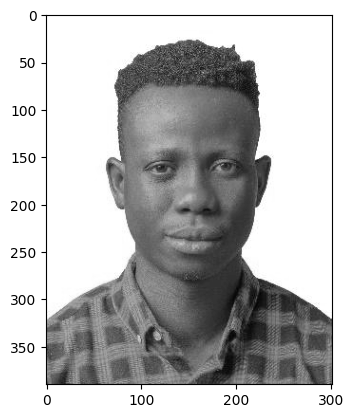

In [72]:
# Canny Edge detector
rgb_image = img_array[:,:,[2,1,0]] # from BGR to RGB
gray_image = cv.cvtColor(rgb_image, cv.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

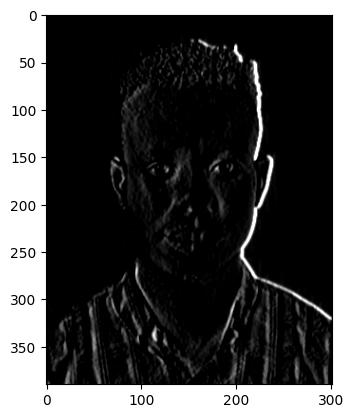

In [73]:
# dericative of Guassian
img_noise_gauss = cv.filter2D(gray_image, ddepth=-1, kernel =cv.flip(gaussian_filter_9x9, -1))
# X-direction
x_deriv = cv.filter2D(img_noise_gauss, ddepth=-1, kernel =cv.flip(sobel_filter_x, -1))
plt.imshow(x_deriv, cmap='gray')


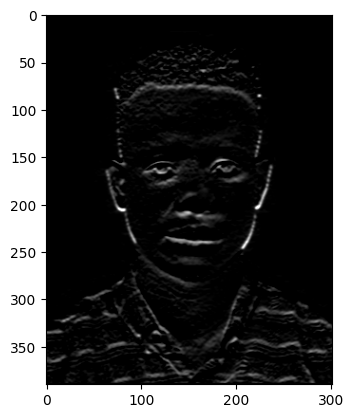

In [74]:
# Y-direction
y_deriv = cv.filter2D(img_noise_gauss, ddepth=-1, kernel =cv.flip(sobel_filter_y, -1))
plt.imshow(y_deriv, cmap='gray')


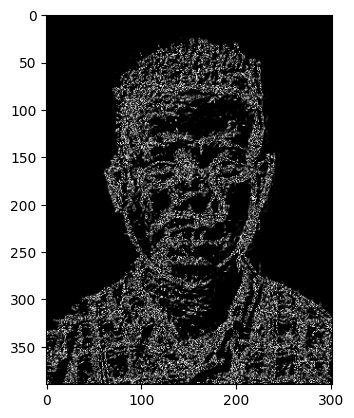

In [75]:
grad_magnitude = np.sqrt(x_deriv**2 + y_deriv**2)
#plt.imshow(grad_magnitude, cmap='gray') 
plt.imshow(pow(grad_magnitude, 4), cmap='gray') # x4 for visualization

In [76]:
theta = np.arctan2(y_deriv, x_deriv) 

In [77]:
threshold_value = 0.01
thresholded = np.zeros(theta.shape)
thresholded[theta>threshold_value] = theta[theta>threshold_value]

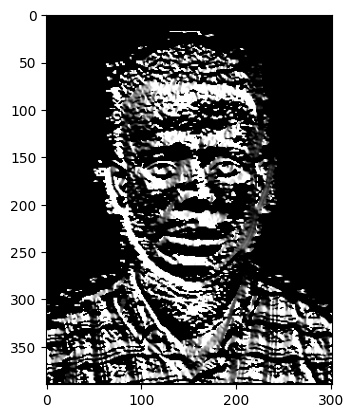

In [78]:
plt.imshow(theta, cmap='gray')

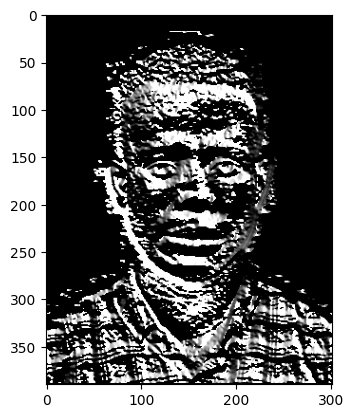

In [79]:
plt.imshow(thresholded, cmap='gray')

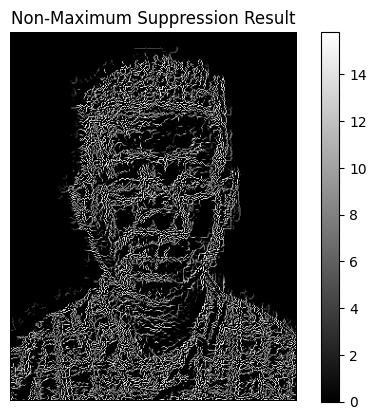

In [80]:
def non_maximum_suppression(gradient_magnitude, theta):
    # Get the shape of the image
    height, width = gradient_magnitude.shape
    # Initialize the output image
    suppressed = np.zeros((height, width), dtype=np.float32)

    # Iterate through the image
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            # Determine the angle of the gradient
            angle = theta[y, x] * (180 / np.pi)  # Convert to degrees
            angle = angle % 180  # Normalize to [0, 180)

            # Determine the neighboring pixels based on the angle
            if (0 <= angle < 22.5) or (157.5 <= angle < 180):
                q = gradient_magnitude[y, x + 1]  # East
                r = gradient_magnitude[y, x - 1]  # West
            elif (22.5 <= angle < 67.5):
                q = gradient_magnitude[y + 1, x + 1]  # Southeast
                r = gradient_magnitude[y - 1, x - 1]  # Northwest
            elif (67.5 <= angle < 112.5):
                q = gradient_magnitude[y + 1, x]  # South
                r = gradient_magnitude[y - 1, x]  # North
            elif (112.5 <= angle < 157.5):
                q = gradient_magnitude[y - 1, x + 1]  # Northeast
                r = gradient_magnitude[y + 1, x - 1]  # Southwest

            # Suppress non-maximum pixels
            if (gradient_magnitude[y, x] >= q) and (gradient_magnitude[y, x] >= r):
                suppressed[y, x] = gradient_magnitude[y, x]

    return suppressed

# Apply non-maximum suppression
nms_result = non_maximum_suppression(grad_magnitude, thresholded)

# Optional: Visualize the result
plt.imshow(nms_result, cmap='gray')
plt.title('Non-Maximum Suppression Result')
plt.axis('off')
plt.colorbar()
plt.show()

In [81]:
gray_image.shape

(390, 302)

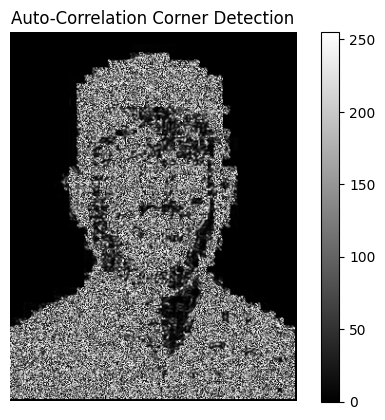

In [82]:
# Corner detection by Auto-correlation


conv_image = np.zeros_like(gray_image)
window_size = 2
window = np.ones((window_size, window_size))
# Initialize the output image
conv_image = np.zeros_like(gray_image)

# Set the offset for shifting
u, v = 1, 1  # You can adjust these to define how much you shift

# Perform the auto-correlation
for i in range(gray_image.shape[0] - window_size):
    for j in range(gray_image.shape[1] - window_size):
        # Define the region for the current pixel
        region = gray_image[i:i + window_size, j:j + window_size]

        # Define the region after the shift
        region_shifted = gray_image[i + u:i + u + window_size, j + v:j + v + window_size]

        # Compute the auto-correlation
        conv_image[i, j] = np.sum(window * (region_shifted - region) ** 2)

# Optional: Normalize the result for visualization
conv_image = cv.normalize(conv_image, None, 0, 255, cv.NORM_MINMAX)

# Display the result
plt.imshow(conv_image, cmap='gray')
plt.title('Auto-Correlation Corner Detection')
plt.axis('off')
plt.colorbar()
plt.show()

In [83]:
from typing import Tuple


def compute_harris_response(I: np.array, k: float = 0.06) -> Tuple[np.array]:
    """Determines the Harris Response of an Image.

    Args:
        I: A Gray-level image in float32 format.
        k: A constant changing the trace to determinant ratio.

    Returns:
        A tuple with float images containing the Harris response (R) and other intermediary images. Specifically
        (R, A, B, C, Idx, Idy).
    """
    #assert I.dtype == np.float32

    # Step 1: Compute Idx and Idy with cv2.Sobel
    Idx = cv.Sobel(I, cv2.CV_32F, 1, 0, ksize=3)
    Idy = cv.Sobel(I, cv2.CV_32F, 0, 1, ksize=3)

    # Step 2: Ixx Iyy Ixy from Idx and Idy
    Ixx = pow(Idx, 2)
    Iyy = pow(Idy, 2)
    Ixy = Idx * Idy

    # Step 3: compute A, B, C from Ixx, Iyy, Ixy with cv2.GaussianBlur
    # Use sdev = 1 and kernelSize = (3, 3) in cv2.GaussianBlur
    sdev = 1
    kernelSize = (3, 3)
    A = cv.GaussianBlur(Ixx, kernelSize, sdev)
    B = cv.GaussianBlur(Iyy, kernelSize, sdev)
    C = cv.GaussianBlur(Ixy, kernelSize, sdev)

    # Step 4: Compute the harris response with the determinant and the trace of T
    det_T = A * B - C * C
    trace_T = A + B
    R = det_T - k * (trace_T**2)

    return (R, A, B, C, Idx, Idy)


harris_resp = compute_harris_response(gray_image)

In [84]:
R, A, B, C, Idx, Idy = harris_resp

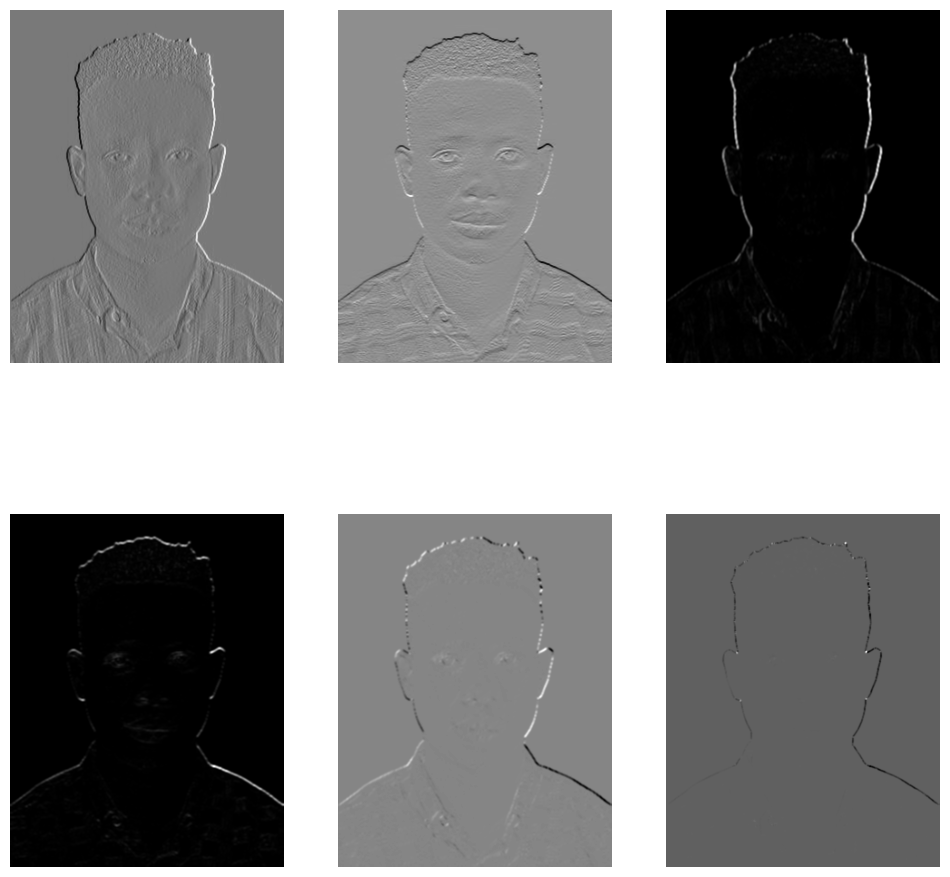

In [85]:
rows = 2
cols = 3
plt.figure(figsize=(12, 12))


plt.subplot(rows, cols,1)
plt.axis('off')
plt.imshow(Idx, cmap='gray')

plt.subplot(rows, cols,2)
plt.axis('off')
plt.imshow(Idy, cmap='gray')


plt.subplot(rows, cols,3)
plt.axis('off')
plt.imshow(A, cmap='gray')


plt.subplot(rows, cols,4)
plt.axis('off')
plt.imshow(B, cmap='gray')

plt.subplot(rows, cols,5)
plt.axis('off')
plt.imshow(C, cmap='gray')

# Harris response
plt.subplot(rows, cols,6)
plt.axis('off')
plt.imshow(R, cmap='gray')


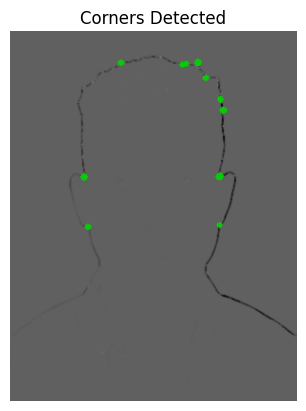

In [86]:
threshold = 0.2 * R.max()  # 20% of the maximum value of R
y_coords, x_coords = np.where(R > threshold)  # Get coordinates of corners

radius = 3
color = (10, 200, 10)  # Green in BGR format

# Create a copy of the original image (assuming it's in grayscale)
# For displaying, we create a blank color image
image_with_corners = np.zeros((R.shape[0], R.shape[1], 3), dtype=np.uint8)

# Draw green dots at the detected corners
for x, y in zip(x_coords, y_coords):
    cv2.circle(image_with_corners, (x, y), radius, color, -1)  # -1 fills the circle

# Normalize R for background to visualize better
normalized_R = cv2.normalize(R, None, 0, 255, cv2.NORM_MINMAX)
normalized_R = np.uint8(normalized_R)

# Overlay the normalized R as a grayscale background
# Make sure the image_with_corners retains the color information
image_with_corners[:, :, 0] = normalized_R  # Blue channel
image_with_corners[:, :, 1] = normalized_R  # Green channel
image_with_corners[:, :, 2] = normalized_R  # Red channel

# Now draw the green dots on top of the gray image
keypoint = []
for x, y in zip(x_coords, y_coords):
    cv2.circle(image_with_corners, (x, y), radius, color, -1)  # -1 fills the circle
    keypoint = (x,y)

# Display the image with corners
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Corners Detected')
plt.axis('off')
plt.show()

In [87]:
def detect_corners(R: np.array, threshold: float = 0.1) -> Tuple[np.array, np.array]:
    """Computes key-points from a Harris response image.

    Key points are all points where the harris response is significant and greater than its neighbors.

    Args:
        R: A float image with the harris response
        threshold: A float determining which Harris response values are significant.

    Returns:
        A tuple of two 1D integer arrays containing the x and y coordinates of key-points in the image.
    """
    # Step 1 (recommended): Pad the response image to facilitate vectorization
    corners = np.zeros(R.shape[:2], dtype=bool)  # Only 2D array needed for corner detection

    # Get the shape of the Harris response function
    rows, cols = R.shape

    # Iterate over each pixel in R
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Check the threshold for all channels
            pixel_values = R[i, j]
            if np.all(pixel_values > threshold):
                # Extract the 3x3 neighborhood for each channel
                neighborhood = R[i-1:i+2, j-1:j+2]
                
                # Check if the current pixel is a local maximum across all channels
                if np.all(pixel_values == np.max(neighborhood, axis=(0, 1))):
                    corners[i, j] = True

    # Get the coordinates of the detected corners
    



    # Step 2 (recommended): Create one image for every offset in the 3x3 neighborhood


    # Step 3 (recommended): Compute the greatest neighbor of every pixel


    # Step 4 (recommended): Compute a boolean image with only all key-points set to True


    # Step 5 (recommended): Use np.nonzero to compute the locations of the key-points from the boolean image
    y_coords, x_coords = np.nonzero(corners)

    return (y_coords, x_coords)


corn_x, corn_y = detect_corners(R, 0.5)
print(corn_x.shape, corn_y.shape)

(3345,) (3345,)


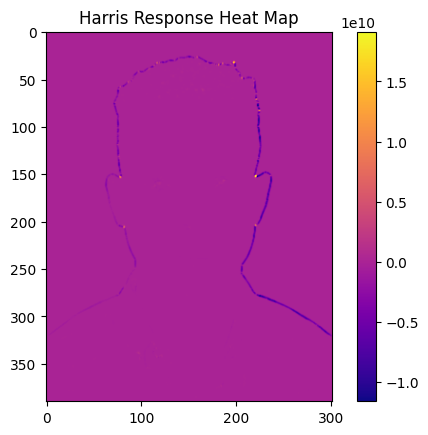

In [88]:
plt.imshow(R, cmap='plasma')  # 'jet', 'plasma', 
plt.colorbar() 
plt.title('Harris Response Heat Map')
plt.show()

In [89]:
keypoint

(82, 206)

In [90]:
M = np.empty((gray_image.shape[0], gray_image.shape[1], 2, 2), dtype=np.float32)  # Shape (390, 302, 2, 2)

M[:, :, 0, 0] = A  # A
M[:, :, 0, 1] = C  # C
M[:, :, 1, 0] = C  # C
M[:, :, 1, 1] = B  # B

M.shape

(390, 302, 2, 2)

In [91]:
U,S,Vt = np.linalg.svd(M)


In [92]:
np.nonzero(S)

(array([ 13,  13,  13, ..., 389, 389, 389]),
 array([128, 128, 129, ..., 300, 301, 301]),
 array([0, 1, 0, ..., 1, 0, 1]))

In [93]:
Vt[-1].shape

(302, 2, 2)

In [94]:
M[:,:,1].shape

(390, 302, 2)

In [95]:
# Parts of Exercies 01  Review for exam


test_M = np.zeros((gray_image.shape[0], gray_image.shape[1], 2,2))

In [96]:
test_M.shape

(390, 302, 2, 2)

In [97]:
test_M[:,:, 0,0] =A
test_M[:,:, 0,1] =C
test_M[:,:, 1,1] =B
test_M[:,:, 1,0] =C

In [98]:
test_M[:,:, 0,0]

array([[    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [ 3984.14892578,  5923.64306641,  7003.04541016, ...,
         9363.25585938,  2749.8046875 ,  1165.51452637],
       [ 7569.48828125, 11965.76757812, 14877.14355469, ...,
        12701.22460938,  2973.54272461,   844.44213867],
       [ 9393.22949219, 15091.06445312, 19010.71875   , ...,
        14240.98925781,  3171.05224609,   807.61462402]])

In [99]:
M[:,:, 0,0]

array([[    0.     ,     0.     ,     0.     , ...,     0.     ,
            0.     ,     0.     ],
       [    0.     ,     0.     ,     0.     , ...,     0.     ,
            0.     ,     0.     ],
       [    0.     ,     0.     ,     0.     , ...,     0.     ,
            0.     ,     0.     ],
       ...,
       [ 3984.149  ,  5923.643  ,  7003.0454 , ...,  9363.256  ,
         2749.8047 ,  1165.5145 ],
       [ 7569.4883 , 11965.768  , 14877.144  , ..., 12701.225  ,
         2973.5427 ,   844.44214],
       [ 9393.2295 , 15091.064  , 19010.719  , ..., 14240.989  ,
         3171.0522 ,   807.6146 ]], dtype=float32)

In [100]:
det_T = A * B - C * C
det_T

array([[       0.  ,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ],
       [       0.  ,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ],
       [       0.  ,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ],
       ...,
       [25139608.  , 28948608.  , 13455083.  , ...,  9557102.  ,
         3292691.  ,  1439627.9 ],
       [37957552.  , 45721064.  , 23644612.  , ...,  2186839.8 ,
          594351.06,   235527.58],
       [24752718.  , 29352366.  , 15788571.  , ...,  2721758.2 ,
          312168.62,    91600.7 ]], dtype=float32)

In [101]:
np.linalg.det(M)

array([[       0.  ,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ],
       [       0.  ,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ],
       [       0.  ,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ],
       ...,
       [25139608.  , 28948610.  , 13455083.  , ...,  9557101.  ,
         3292691.2 ,  1439627.9 ],
       [37957552.  , 45721064.  , 23644612.  , ...,  2186839.8 ,
          594351.1 ,   235527.58],
       [24752716.  , 29352366.  , 15788571.  , ...,  2721758.2 ,
          312168.62,    91600.7 ]], dtype=float32)

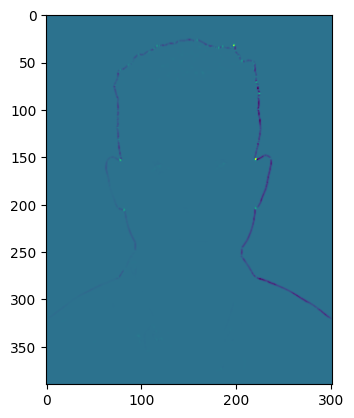

In [102]:
plt.imshow(R)

In [103]:
corners = np.zeros(R.shape)
t_h = 0.1
corners[R > t_h] = R[ R > t_h]

In [104]:
corners.shape

(390, 302)

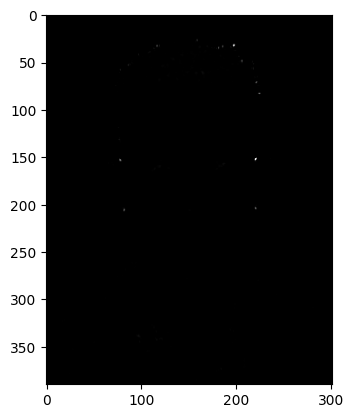

In [106]:
plt.imshow(corners, cmap='gray')

In [107]:
y_coord, x_coord = np.nonzero(corners)


In [108]:
x_coord, y_coord

(array([129, 130, 142, ..., 296, 297, 301]),
 array([ 14,  14,  14, ..., 389, 389, 389]))

In [109]:
R[y_coord, x_coord]

array([7.9265749e-01, 1.1441419e+00, 3.6992300e-01, ..., 4.1232200e+06,
       4.8469080e+06, 3.6825781e+04], dtype=float32)

In [110]:
edges = np.zeros(R.shape)
t_e =  - 0.1
edges[R < t_e] = R[ R < t_e]

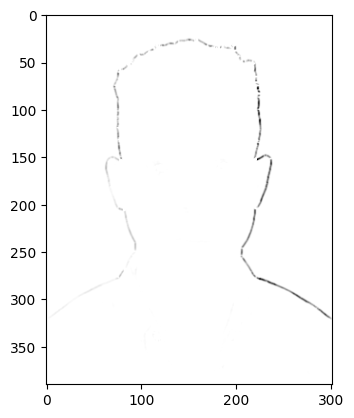

In [111]:
plt.imshow(edges, cmap='gray')

In [112]:
# Parts of  Exercies 02  Review for exam


# Panorama stitching

N=  10

ones = np.ones((N, 1))
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [113]:
homogenous = np.hstack((np.random.rand(N,N), ones))

In [114]:
homogenous[0]

array([0.29736473, 0.02122615, 0.41746763, 0.51841662, 0.35205451,
       0.89849051, 0.51113559, 0.06054367, 0.7899127 , 0.02151993,
       1.        ])

In [115]:
# Corner Detection revisited
y_coord

array([ 14,  14,  14, ..., 389, 389, 389])

In [121]:
# Exer 02 Bug fix

def detect_corners(R: np.array, threshold: float = 0.1) -> Tuple[np.array, np.array]:
    """Computes key-points from a Harris response image.

    Key points are all points where the harris response is significant and greater than its neighbors.

    Args:
        R: A float image with the harris response
        threshold: A float determining which Harris response values are significant.

    Returns:
        A tuple of two 1D integer arrays containing the x and y coordinates of key-points in the image.
    """
    # Step 1 (recommended): Pad the response image to facilitate vectorization
    corners = thresh_corners = np.zeros(R.shape[:2], dtype=bool)  # Only 2D array needed for corner detection

    # Get the shape of the Harris response function
    rows, cols = R.shape

    thresh_corners[R > threshold] = R[ R > threshold]

    # Iterate over each pixel in R
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Check the threshold for all channels
            pixel_values = R[i, j]
            if thresh_corners[i,j]>threshold:
                neighborhood = thresh_corners[i-1:i+2, j-1:j+2]
                
                # Check if the current pixel is a local maximum across all channels
                if np.all(pixel_values == np.max(neighborhood, axis=(0, 1))):
                    corners[i, j] = True

    # Get the coordinates of the detected corners
    



    # Step 2 (recommended): Create one image for every offset in the 3x3 neighborhood


    # Step 3 (recommended): Compute the greatest neighbor of every pixel


    # Step 4 (recommended): Compute a boolean image with only all key-points set to True


    # Step 5 (recommended): Use np.nonzero to compute the locations of the key-points from the boolean image
    y_coords, x_coords = np.nonzero(corners)

    return (y_coords, x_coords)


det_corners = detect_corners(R, 0.1)
det_corners

(array([ 14,  14,  14, ..., 389, 389, 389]),
 array([129, 130, 142, ..., 296, 297, 301]))

In [122]:
def detect_corners(R: np.array, threshold: float = 0.1) -> Tuple[np.array, np.array]:
    """Computes key-points from a Harris response image.

    Key points are all points where the harris response is significant and greater than its neighbors.

    Args:
        R: A float image with the harris response
        threshold: A float determining which Harris response values are significant.

    Returns:
        A tuple of two 1D integer arrays containing the x and y coordinates of key-points in the image.
    """
    # Step 1 (recommended): Pad the response image to facilitate vectorization
    corners = np.zeros(R.shape[:2], dtype=bool)  # Only 2D array needed for corner detection

    # Get the shape of the Harris response function
    rows, cols = R.shape

    # Iterate over each pixel in R
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Check the threshold for all channels
            pixel_values = R[i, j]
            if np.all(pixel_values > threshold):
                # Extract the 3x3 neighborhood for each channel
                neighborhood = R[i-1:i+2, j-1:j+2]
                
                # Check if the current pixel is a local maximum across all channels
                if np.all(pixel_values == np.max(neighborhood, axis=(0, 1))):
                    corners[i, j] = True

    # Get the coordinates of the detected corners
    



    # Step 2 (recommended): Create one image for every offset in the 3x3 neighborhood


    # Step 3 (recommended): Compute the greatest neighbor of every pixel


    # Step 4 (recommended): Compute a boolean image with only all key-points set to True


    # Step 5 (recommended): Use np.nonzero to compute the locations of the key-points from the boolean image
    y_coords, x_coords = np.nonzero(corners)

    return (y_coords, x_coords)

det_corners = detect_corners(R, 0.1)
det_corners

(array([ 16,  16,  17, ..., 388, 388, 388]),
 array([144, 175, 129, ..., 194, 217, 221]))

In [ ]:
corners = np.zeros(R.shape)
t_h = 0.1
corners[R > t_h] = R[ R > t_h]